In [1]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


from dataset import *

## DataSet

#### Category Attribute

289222
0 (224, 224, 3) [ 50  58 186 223] 0
1 (224, 224, 3) [ 68  27 178 154] 0
2 (224, 224, 3) [ 78   0 190 127] 0
3 (224, 224, 3) [ 47  73 195 223] 0


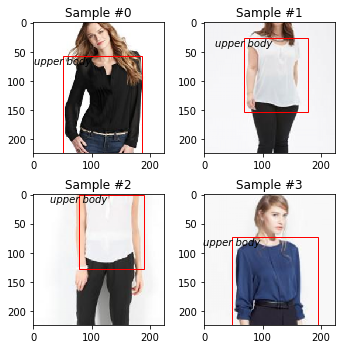

In [2]:
df_dataset = DeepFashionDataset(Category_Attribute_reader,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224)
                                           ]))
print(len(df_dataset))
fig = plt.figure(figsize=[5, 5])

for i in range(len(df_dataset)):
    sample = df_dataset[i]

    print(i, sample['image'].shape, sample['bbox'], sample['type'])

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
#     ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

#### Cusumer-to-shop

239557
0 (224, 224, 3) [  0   0 223 223] 0
1 (224, 224, 3) [ 54   0 152 129] 2
2 (224, 224, 3) [ 65  34 128 134] 2
3 (224, 224, 3) [ 60   0 223 180] 2


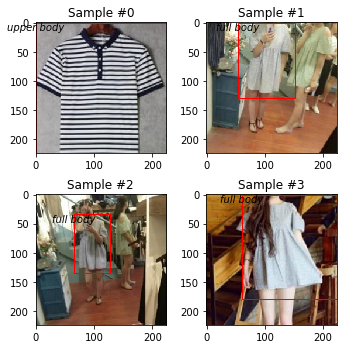

In [3]:
df_dataset = DeepFashionDataset(Consumer_to_shop_reader,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224)
                                           ]))
print(len(df_dataset))
fig = plt.figure(figsize=[5, 5])

for i in range(len(df_dataset)):
    sample = df_dataset[-i]

    print(i, sample['image'].shape, sample['bbox'], sample['type'])

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
#     ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

#### Landmark Detection

123016
0 (512, 349, 3) [ 53 130 289 440] 0
1 (512, 342, 3) [ 78 127 257 415] 2
2 (440, 300, 3) [108  77 264 394] 2
3 (346, 236, 3) [  5  59 101 220] 2


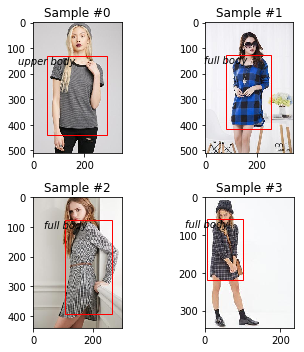

In [4]:
df_dataset = DeepFashionDataset(Landmark_Detection_reader)
print(len(df_dataset))
fig = plt.figure(figsize=[5, 5])

for i in range(len(df_dataset)):
    sample = df_dataset[-i]

    print(i, sample['image'].shape, sample['bbox'], sample['type'])

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
#     ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

#### In shop(后面的测试都是基于In shop)

52712
0 (256, 256, 3) [ 50  49 208 235] 0
1 (256, 256, 3) [119  48 136 234] 0
2 (256, 256, 3) [ 50  42 213 240] 0
3 (256, 256, 3) [ 82  30 162 129] 0


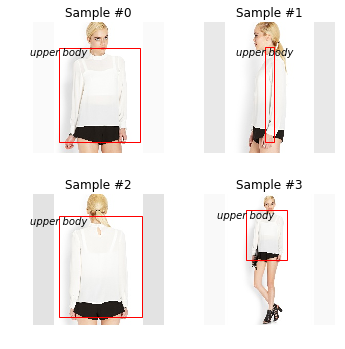

In [4]:
df_dataset = DeepFashionDataset(In_shop_reader)
print(len(df_dataset))
fig = plt.figure(figsize=[5, 5])

for i in range(len(df_dataset)):
    sample = df_dataset[i]

    print(i, sample['image'].shape, sample['bbox'], sample['type'])

    ax = plt.subplot(2, 2, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_bbox(**sample)

    if i == 3:
        plt.show()
        break

## DataTransform

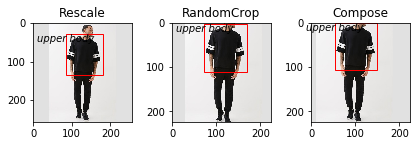

In [5]:
scale = Rescale(256)
crop = RandomCrop(224)
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])

# Apply each of the above transforms on sample.
fig = plt.figure()
sample = df_dataset[32]
for i, tsfrm in enumerate([scale, crop, composed]):
    transformed_sample = tsfrm(sample)

    ax = plt.subplot(1, 3, i + 1)
    plt.tight_layout()
    ax.set_title(type(tsfrm).__name__)
    show_bbox(**transformed_sample)

plt.show()

In [7]:
transformed_dataset = DeepFashionDataset(In_shop_reader,
                                           transform=transforms.Compose([
                                               Rescale(256),
                                               RandomCrop(224),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['bbox'], sample['type'])

    if i == 3:
        break

0 torch.Size([3, 224, 224]) tensor([ 27,  18, 185, 204], dtype=torch.int32) 0
1 torch.Size([3, 224, 224]) tensor([118,  40, 135, 223], dtype=torch.int32) 0
2 torch.Size([3, 224, 224]) tensor([ 42,  35, 205, 223], dtype=torch.int32) 0
3 torch.Size([3, 224, 224]) tensor([ 70,  21, 150, 120], dtype=torch.int32) 0


## DataBatch

0 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
1 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
2 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
3 torch.Size([4, 3, 224, 224]) torch.Size([4, 4])
tensor([ 50,  42, 184, 223], dtype=torch.int32)
tensor([ 46,   6, 197, 201], dtype=torch.int32)
tensor([ 65,  55, 178, 213], dtype=torch.int32)
tensor([ 82,  33, 131, 101], dtype=torch.int32)


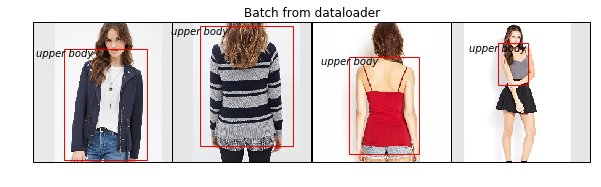

In [8]:
dataloader = DataLoader(transformed_dataset, batch_size=4, shuffle=True)


# Helper function to show a batch
def show_bbox_batch(sample_batched):
    """Show image with bbox for a batch of samples."""
    images_batch, bbox_batch, type_batch = \
            sample_batched['image'], sample_batched['bbox'], sample_batched['type']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    
    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    
    for i in range(batch_size):
        bbox = bbox_batch[i]
        print(bbox)
        plt.gca().add_patch(plt.Rectangle((bbox[0]+ i * im_size, bbox[1]), bbox[2] - bbox[0],bbox[3] - bbox[1],  fill=False, edgecolor='r', linewidth=1))
        plt.text(bbox[0] + i * im_size, bbox[1], type_name[type_batch[i]], fontsize=10, style='oblique', ha='center',va='top',wrap=True)
        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['bbox'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure(figsize=[10, 10])
        show_bbox_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break